In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading of data
data=pd.read_csv('ADA001 - 2017 Upper House Attendance.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Basic Checks

In [4]:
# prints first 5 rows of the data
data.head()

,s.no.,Division/ SeatNo,Name Of Member,session,From Date,To Date,State,Total Sittings,No Of Days Member Signed The Register
0,1,0,Shri Vinay Dinu Tendulkar,243,17-07-2017,11-08-2017,Goa,19,9
1,2,0,Smt. Sampatiya Uikey,243,17-07-2017,11-08-2017,Madhya Pradesh,19,2
2,3,1,Shri Arun Jaitley,243,17-07-2017,11-08-2017,Gujarat,19,M
3,4,3,Shri Manohar Parrikar,243,17-07-2017,11-08-2017,Uttar Pradesh,19,1
4,5,4,Shri Mukhtar Abbas Naqvi,243,17-07-2017,11-08-2017,Jharkhand,19,M


In [5]:
# prints last5 rows of the data
data.tail()

,s.no.,Division/ SeatNo,Name Of Member,session,From Date,To Date,State,Total Sittings,No Of Days Member Signed The Register
244,245,243,Smt. Rajani Patil,243,17-07-2017,11-08-2017,Maharashtra,19,18
245,246,244,Smt. Wansuk Syiem,243,17-07-2017,11-08-2017,Meghalaya,19,12
246,247,246,Shri Ripun Bora,243,17-07-2017,11-08-2017,Assam,19,17
247,248,249,Dr. Pradeep Kumar Balmuchu,243,17-07-2017,11-08-2017,Jharkhand,19,17
248,249,250,Shri Mahendra Singh Mahra,243,17-07-2017,11-08-2017,Uttarakhand,19,19


In [6]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()

,s.no.,Division/ SeatNo,session,Total Sittings
count,249.000000,249.000000,249.0,249.0
mean,125.000000,122.899598,243.0,19.0
std,72.024301,71.077039,0.0,0.0
min,1.000000,0.000000,243.0,19.0
25%,63.000000,62.000000,243.0,19.0
50%,125.000000,125.000000,243.0,19.0
75%,187.000000,183.000000,243.0,19.0
max,249.000000,250.000000,243.0,19.0


In [7]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   s.no.                                  249 non-null    int64 
 1   Division/ SeatNo                       249 non-null    int64 
 2   Name Of Member                         249 non-null    object
 3   session                                249 non-null    int64 
 4   From Date                              249 non-null    object
 5   To Date                                249 non-null    object
 6   State                                  249 non-null    object
 7   Total Sittings                         249 non-null    int64 
 8   No Of Days Member Signed The Register  249 non-null    object
dtypes: int64(4), object(5)
memory usage: 17.6+ KB


In [8]:
# it shows the number columns and rows that data consists
data.shape

(249, 9)

In [9]:
# displays all the columns
data.columns

Index(['s.no.', 'Division/ SeatNo', 'Name Of Member', 'session', 'From Date',
       'To Date', 'State', 'Total Sittings',
       'No Of Days Member Signed The Register'],
      dtype='object')

## Data Preprocessing

In [10]:
# These are the new columns
## the columns from the original can be renamed at our convinience
data=data.rename(columns={'Division/ SeatNo':'Division_SeatNo','Name Of Member':'Name_Of_Member','Total Sittings':'Total_Sittings','From Date':'From_Date',
                                'To Date':'To_Date','No Of Days Member Signed The Register':'No_Of_Days_Member_Signed_The_Register'})

In [11]:
data.describe(include=['object'])

,Name_Of_Member,From_Date,To_Date,State,No_Of_Days_Member_Signed_The_Register
count,249,249,249,249,249
unique,244,1,1,32,21
top,Shri Rajaram,17-07-2017,11-08-2017,Uttar Pradesh,19
freq,2,249,249,35,61


In [12]:
data.describe(include=['integer'])

,s.no.,Division_SeatNo,session,Total_Sittings
count,249.000000,249.000000,249.0,249.0
mean,125.000000,122.899598,243.0,19.0
std,72.024301,71.077039,0.0,0.0
min,1.000000,0.000000,243.0,19.0
25%,63.000000,62.000000,243.0,19.0
50%,125.000000,125.000000,243.0,19.0
75%,187.000000,183.000000,243.0,19.0
max,249.000000,250.000000,243.0,19.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   s.no.                                  249 non-null    int64 
 1   Division_SeatNo                        249 non-null    int64 
 2   Name_Of_Member                         249 non-null    object
 3   session                                249 non-null    int64 
 4   From_Date                              249 non-null    object
 5   To_Date                                249 non-null    object
 6   State                                  249 non-null    object
 7   Total_Sittings                         249 non-null    int64 
 8   No_Of_Days_Member_Signed_The_Register  249 non-null    object
dtypes: int64(4), object(5)
memory usage: 17.6+ KB


In [14]:
# Coverting all the values in proper Datetime format
#data['From_Date'] = pd.to_datetime(data['From_Date']).dt.date
#data['To_Date'] = pd.to_datetime(data['To_Date']).dt.date
data['From_Date']= pd.to_datetime(data['From_Date'], infer_datetime_format=True)
data['To_Date']= pd.to_datetime(data['To_Date'], infer_datetime_format=True)

### checking duplicate and null values

In [15]:
data['Division_SeatNo'].duplicated().sum()

6

In [16]:
data['Name_Of_Member'].duplicated().sum()

5

In [17]:
data.isnull().values.any()

False

In [18]:
data.isnull().sum()

s.no.                                    0
Division_SeatNo                          0
Name_Of_Member                           0
session                                  0
From_Date                                0
To_Date                                  0
State                                    0
Total_Sittings                           0
No_Of_Days_Member_Signed_The_Register    0
dtype: int64

In [19]:
## detect missing values in the given series object. 
## It return a boolean same-sized object indicating if the values are NA. 
## Missing values gets mapped to True and non-missing value gets mapped to False 
data.isna().any()

s.no.                                    False
Division_SeatNo                          False
Name_Of_Member                           False
session                                  False
From_Date                                False
To_Date                                  False
State                                    False
Total_Sittings                           False
No_Of_Days_Member_Signed_The_Register    False
dtype: bool

<AxesSubplot:>

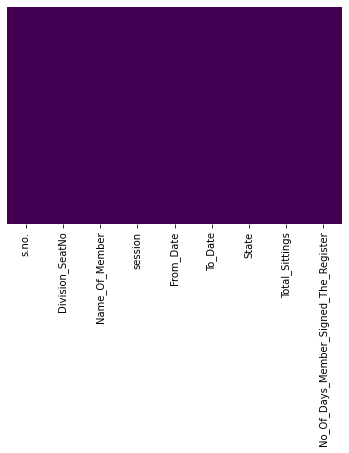

In [20]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Checking unique in column

In [21]:
#checking out the number of categories present in each  categorical features.
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Name_Of_Member                           244
State                                     32
No_Of_Days_Member_Signed_The_Register     21
dtype: int64

In [22]:
#checking out the number of integer present in each integer features.
data.select_dtypes('integer').apply(pd.Series.nunique, axis = 0)

s.no.              249
Division_SeatNo    243
session              1
Total_Sittings       1
dtype: int64

In [23]:
data.State.unique()

array(['Goa', 'Madhya Pradesh', 'Gujarat', 'Uttar Pradesh', 'Jharkhand',
       'Karnataka', 'Rajasthan', 'Bihar', 'Punjab', 'Manipur',
       'Nominated', 'Andhra Pradesh', 'Himachal Pradesh', 'Haryana',
       'Maharashtra', 'Chhattisgarh', 'Tamil Nadu', 'Assam',
       'Jammu & Kashmir', 'Sikkim', 'Odisha', 'West Bengal', 'Telangana',
       'Puducherry', 'Tripura', 'Kerala', 'Nagaland',
       'National Capital Territory of Delhi', 'Uttarakhand', 'Mizoram',
       'Arunachal Pradesh', 'Meghalaya'], dtype=object)

In [24]:
data.No_Of_Days_Member_Signed_The_Register.unique()

array(['9', '2', 'M', '1', '18', '19', '14', '16', '17', '8', '13', '11',
       '12', '10', '15', '6', '7', '4', '5', 'LOP', 'HDC'], dtype=object)

In [25]:
data.Name_Of_Member.unique()

array(['Shri Vinay Dinu Tendulkar', 'Smt. Sampatiya Uikey',
       'Shri Arun Jaitley', 'Shri Manohar Parrikar',
       'Shri Mukhtar Abbas Naqvi', 'Smt. Nirmala Sitharaman',
       'Shri Vijay Goel', 'Shri Dharmendra Pradhan',
       'Shri Parshottam Rupala', 'Shri Gopal Narayan Singh',
       'Shri Vinay Katiyar', 'Shri Bhupender Yadav', 'Dr. Prabhakar Kore',
       'Shri Meghraj Jain', 'Shri Ram Narain Dudi',
       'Shri Narayan Lal Panchariya', 'Shri Chunibhai Kanjibhai Gohel',
       'Mahant Shambhuprasadji Tundiya', 'Shri Lal Sinh Vadodia',
       'Shri Shwait Malik', 'Shri Ramkumar Verma',
       'Shri K. Bhabananda Singh', 'Shri Mahesh Poddar',
       'Smt. Roopa Ganguly', 'Shri M. Venkaiah Naidu',
       'Shri Ravi Shankar Prasad', 'Shri Thaawar Chand Gehlot',
       'Shri Suresh Prabhu', 'Shri Jagat Prakash Nadda',
       'Shri Prakash Javadekar', 'Chaudhary Birender Singh',
       'Shri Piyush Goyal', 'Smt. Smriti Zubin Irani',
       'Shri Mansukh L. Mandaviya', 'Shri M. J

## Exploratory Data Analysis

### Univarient Analysis

In [26]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data,title="Pandas Profiling Report", minimal=True)
profile.to_widgets()
profile.to_file("Pandas_Profiling_Report.html")

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Value counts

In [28]:
data.Division_SeatNo.value_counts()

0      2
129    2
165    2
146    2
134    2
140    2
180    1
179    1
158    1
159    1
160    1
161    1
162    1
163    1
164    1
183    1
182    1
166    1
167    1
168    1
169    1
170    1
156    1
171    1
173    1
174    1
175    1
176    1
181    1
177    1
178    1
157    1
154    1
155    1
139    1
126    1
127    1
128    1
130    1
131    1
132    1
133    1
135    1
136    1
137    1
138    1
141    1
185    1
142    1
143    1
144    1
145    1
147    1
148    1
149    1
150    1
151    1
152    1
153    1
184    1
186    1
124    1
187    1
218    1
219    1
220    1
221    1
222    1
223    1
225    1
227    1
228    1
229    1
230    1
231    1
232    1
233    1
234    1
235    1
236    1
237    1
238    1
239    1
240    1
241    1
242    1
243    1
244    1
246    1
249    1
217    1
216    1
215    1
200    1
188    1
189    1
190    1
191    1
192    1
193    1
194    1
195    1
196    1
197    1
198    1
199    1
201    1
214    1
202    1
203    1
204    1
2

In [29]:
data.Name_Of_Member.value_counts()

Shri Rajaram                         2
Shri Satish Chandra Misra            2
Shri D. Raja                         2
Shri Veer Singh                      2
Shri Ashok Siddharth                 2
Shri Ramdas Athawale                 1
Shri Ram Kumar Kashyap               1
Shri Majeed Memon                    1
Shri Janardan Dwivedi                1
Shri Harshvardhan Singh Dungarpur    1
Shri Hishey Lachungpa                1
Shri A. Navaneethakrishnan           1
Shri Ram Nath Thakur                 1
Dr. Bhushan Lal Jangde               1
Shri Devender Goud T.                1
Shri Rajkumar Dhoot                  1
Dr. Narendra Jadhav                  1
Shri Darshan Singh Yadav             1
Dr. Anil Kumar Sahani                1
Shri C.M. Ramesh                     1
Shri Pramod Tiwari                   1
Shri Madhusudan Mistry               1
Shri Narendra Kumar Swain            1
Shri Rangasayee Ramakrishna          1
Shri Oscar Fernandes                 1
Ms. Anu Aga              

In [30]:
data.State.value_counts()

Uttar Pradesh                          35
Maharashtra                            19
Tamil Nadu                             19
Bihar                                  16
West Bengal                            15
Karnataka                              12
Nominated                              12
Gujarat                                11
Andhra Pradesh                         11
Madhya Pradesh                         11
Odisha                                 10
Rajasthan                              10
Kerala                                  9
Punjab                                  7
Assam                                   7
Telangana                               6
Jharkhand                               6
Haryana                                 5
Chhattisgarh                            5
Jammu & Kashmir                         4
Uttarakhand                             3
Himachal Pradesh                        3
National Capital Territory of Delhi     3
Goa                               

In [31]:
data.Total_Sittings.value_counts()

19    249
Name: Total_Sittings, dtype: int64

In [32]:
data.No_Of_Days_Member_Signed_The_Register.value_counts()

19     61
18     34
17     27
M      19
16     17
14     17
13     12
15      9
11      9
8       8
10      8
12      6
1       6
7       3
2       3
6       3
4       2
9       2
HDC     1
LOP     1
5       1
Name: No_Of_Days_Member_Signed_The_Register, dtype: int64

### Checking repeated member names

In [33]:
data[(data['Name_Of_Member'] =='Shri Ashok Siddharth')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
168,169,165,Shri Ashok Siddharth,243,2017-07-17,2017-11-08,Uttar Pradesh,19,8
221,222,218,Shri Ashok Siddharth,243,2017-07-17,2017-11-08,Uttar Pradesh,19,7


In [34]:
data[(data['Name_Of_Member'] =='Shri Satish Chandra Misra')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
129,130,129,Shri Satish Chandra Misra,243,2017-07-17,2017-11-08,Uttar Pradesh,19,10
134,135,134,Shri Satish Chandra Misra,243,2017-07-17,2017-11-08,Uttar Pradesh,19,7


In [35]:
data[(data['Name_Of_Member'] =='Shri D. Raja')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
141,142,140,Shri D. Raja,243,2017-07-17,2017-11-08,Tamil Nadu,19,11
149,150,146,Shri D. Raja,243,2017-07-17,2017-11-08,Tamil Nadu,19,8


In [36]:
data[(data['Name_Of_Member'] =='Shri Veer Singh')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
135,136,134,Shri Veer Singh,243,2017-07-17,2017-11-08,Uttar Pradesh,19,10
142,143,140,Shri Veer Singh,243,2017-07-17,2017-11-08,Uttar Pradesh,19,8


In [37]:
data[(data['Name_Of_Member'] =='Shri Rajaram')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
148,149,146,Shri Rajaram,243,2017-07-17,2017-11-08,Uttar Pradesh,19,11
169,170,165,Shri Rajaram,243,2017-07-17,2017-11-08,Uttar Pradesh,19,8


### Checking number of signs

In [38]:
data.No_Of_Days_Member_Signed_The_Register.value_counts()

19     61
18     34
17     27
M      19
16     17
14     17
13     12
15      9
11      9
8       8
10      8
12      6
1       6
7       3
2       3
6       3
4       2
9       2
HDC     1
LOP     1
5       1
Name: No_Of_Days_Member_Signed_The_Register, dtype: int64

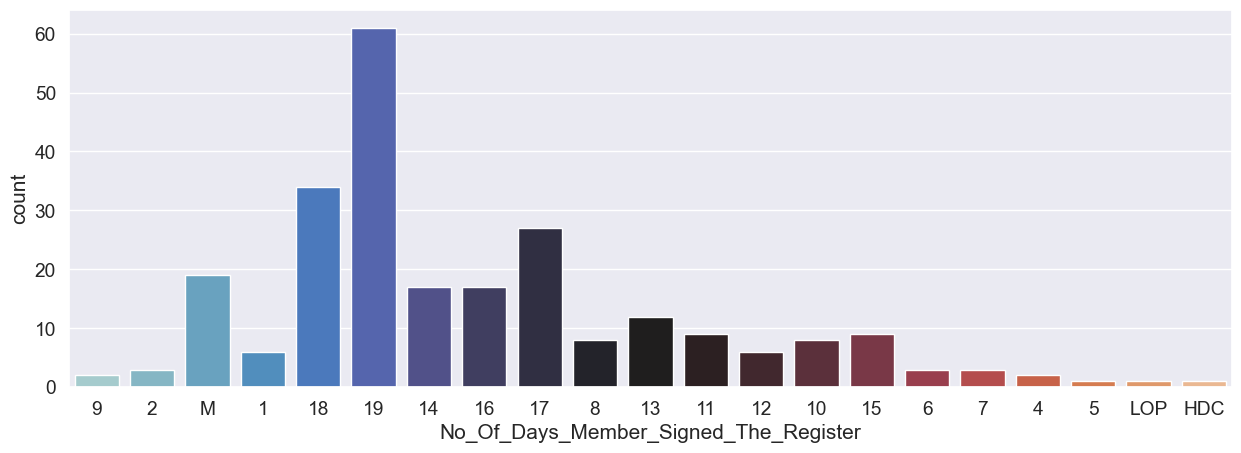

In [39]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,5))
sns.countplot(x="No_Of_Days_Member_Signed_The_Register", data=data, palette="icefire");
plt.show()

In [40]:
display(data[data['No_Of_Days_Member_Signed_The_Register'] == '19'].shape)
data[data['No_Of_Days_Member_Signed_The_Register'] == '19'].head()

(61, 9)

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
10,11,10,Shri Vinay Katiyar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,19
12,13,12,Dr. Prabhakar Kore,243,2017-07-17,2017-11-08,Karnataka,19,19
13,14,13,Shri Meghraj Jain,243,2017-07-17,2017-11-08,Madhya Pradesh,19,19
17,18,17,Mahant Shambhuprasadji Tundiya,243,2017-07-17,2017-11-08,Gujarat,19,19
18,19,18,Shri Lal Sinh Vadodia,243,2017-07-17,2017-11-08,Gujarat,19,19


In [41]:
display(data[data['No_Of_Days_Member_Signed_The_Register'] == '1'].shape)
data[data['No_Of_Days_Member_Signed_The_Register'] == '1'].head(10)

(6, 9)

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
3,4,3,Shri Manohar Parrikar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,1
73,74,73,Shri Sanjay Dattatraya Kakade,243,2017-07-17,2017-11-08,Maharashtra,19,1
83,84,83,Shri Devender Goud T.,243,2017-07-17,2017-11-08,Andhra Pradesh,19,1
99,100,99,Ms. Rekha,243,2017-07-17,2017-11-08,Nominated,19,1
175,176,171,Shri K.G. Kenye,243,2017-07-17,2017-11-08,Nagaland,19,1
198,199,195,Dr. K. Chiranjeevi,243,2017-07-17,2017-11-08,Andhra Pradesh,19,1


In [42]:
display(data[data['No_Of_Days_Member_Signed_The_Register'] == 'M'].shape)
data[data['No_Of_Days_Member_Signed_The_Register'] == 'M'].head(10)

(19, 9)

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
2,3,1,Shri Arun Jaitley,243,2017-07-17,2017-11-08,Gujarat,19,M
4,5,4,Shri Mukhtar Abbas Naqvi,243,2017-07-17,2017-11-08,Jharkhand,19,M
5,6,5,Smt. Nirmala Sitharaman,243,2017-07-17,2017-11-08,Karnataka,19,M
6,7,6,Shri Vijay Goel,243,2017-07-17,2017-11-08,Rajasthan,19,M
7,8,7,Shri Dharmendra Pradhan,243,2017-07-17,2017-11-08,Bihar,19,M
8,9,8,Shri Parshottam Rupala,243,2017-07-17,2017-11-08,Gujarat,19,M
24,25,24,Shri M. Venkaiah Naidu,243,2017-07-17,2017-11-08,Rajasthan,19,M
25,26,25,Shri Ravi Shankar Prasad,243,2017-07-17,2017-11-08,Bihar,19,M
26,27,26,Shri Thaawar Chand Gehlot,243,2017-07-17,2017-11-08,Madhya Pradesh,19,M
27,28,27,Shri Suresh Prabhu,243,2017-07-17,2017-11-08,Andhra Pradesh,19,M


In [43]:
data[(data['No_Of_Days_Member_Signed_The_Register'] =='HDC')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
230,231,229,Prof. P.J. Kurien,243,2017-07-17,2017-11-08,Kerala,19,HDC


In [44]:
data[(data['No_Of_Days_Member_Signed_The_Register'] =='LOP')]

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
229,230,228,Shri Ghulam Nabi Azad,243,2017-07-17,2017-11-08,Jammu & Kashmir,19,LOP


In [45]:
data.head()

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
0,1,0,Shri Vinay Dinu Tendulkar,243,2017-07-17,2017-11-08,Goa,19,9
1,2,0,Smt. Sampatiya Uikey,243,2017-07-17,2017-11-08,Madhya Pradesh,19,2
2,3,1,Shri Arun Jaitley,243,2017-07-17,2017-11-08,Gujarat,19,M
3,4,3,Shri Manohar Parrikar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,1
4,5,4,Shri Mukhtar Abbas Naqvi,243,2017-07-17,2017-11-08,Jharkhand,19,M


In [46]:
# Extracting Minister Data
datam = data[(data['No_Of_Days_Member_Signed_The_Register'] == 'M')]

In [47]:
datam.head()

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
2,3,1,Shri Arun Jaitley,243,2017-07-17,2017-11-08,Gujarat,19,M
4,5,4,Shri Mukhtar Abbas Naqvi,243,2017-07-17,2017-11-08,Jharkhand,19,M
5,6,5,Smt. Nirmala Sitharaman,243,2017-07-17,2017-11-08,Karnataka,19,M
6,7,6,Shri Vijay Goel,243,2017-07-17,2017-11-08,Rajasthan,19,M
7,8,7,Shri Dharmendra Pradhan,243,2017-07-17,2017-11-08,Bihar,19,M


## Dropping 

In [48]:
data.drop(data[(data['No_Of_Days_Member_Signed_The_Register'] == 'M')].index, inplace=True)


In [49]:
data.drop(data[(data['No_Of_Days_Member_Signed_The_Register'] == 'HDC')].index, inplace=True)


In [50]:
data.drop(data[(data['No_Of_Days_Member_Signed_The_Register'] == 'LOP')].index, inplace=True)

In [51]:
data.head()

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
0,1,0,Shri Vinay Dinu Tendulkar,243,2017-07-17,2017-11-08,Goa,19,9
1,2,0,Smt. Sampatiya Uikey,243,2017-07-17,2017-11-08,Madhya Pradesh,19,2
3,4,3,Shri Manohar Parrikar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,1
9,10,9,Shri Gopal Narayan Singh,243,2017-07-17,2017-11-08,Bihar,19,18
10,11,10,Shri Vinay Katiyar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,19


In [52]:
#changing type to int
data['No_Of_Days_Member_Signed_The_Register']=data['No_Of_Days_Member_Signed_The_Register'].astype(int)

In [53]:
#creating new column
data['Unsigned_Days'] = data['Total_Sittings'] - data['No_Of_Days_Member_Signed_The_Register']

In [54]:
## dropping the unwanted columns
## inplace=true will make the changes in original data
data.drop(['s.no.','session','Total_Sittings','From_Date','To_Date'],axis=1,inplace=True)

## States

In [55]:
data.head()

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
0,0,Shri Vinay Dinu Tendulkar,Goa,9,10
1,0,Smt. Sampatiya Uikey,Madhya Pradesh,2,17
3,3,Shri Manohar Parrikar,Uttar Pradesh,1,18
9,9,Shri Gopal Narayan Singh,Bihar,18,1
10,10,Shri Vinay Katiyar,Uttar Pradesh,19,0


In [56]:
data.State.value_counts()

Uttar Pradesh                          35
Tamil Nadu                             19
Maharashtra                            17
West Bengal                            15
Bihar                                  14
Nominated                              12
Karnataka                              11
Odisha                                 10
Andhra Pradesh                          9
Rajasthan                               8
Madhya Pradesh                          8
Kerala                                  8
Punjab                                  7
Gujarat                                 7
Assam                                   7
Telangana                               6
Chhattisgarh                            5
Jharkhand                               5
Haryana                                 4
Uttarakhand                             3
Jammu & Kashmir                         3
National Capital Territory of Delhi     3
Himachal Pradesh                        2
Goa                               

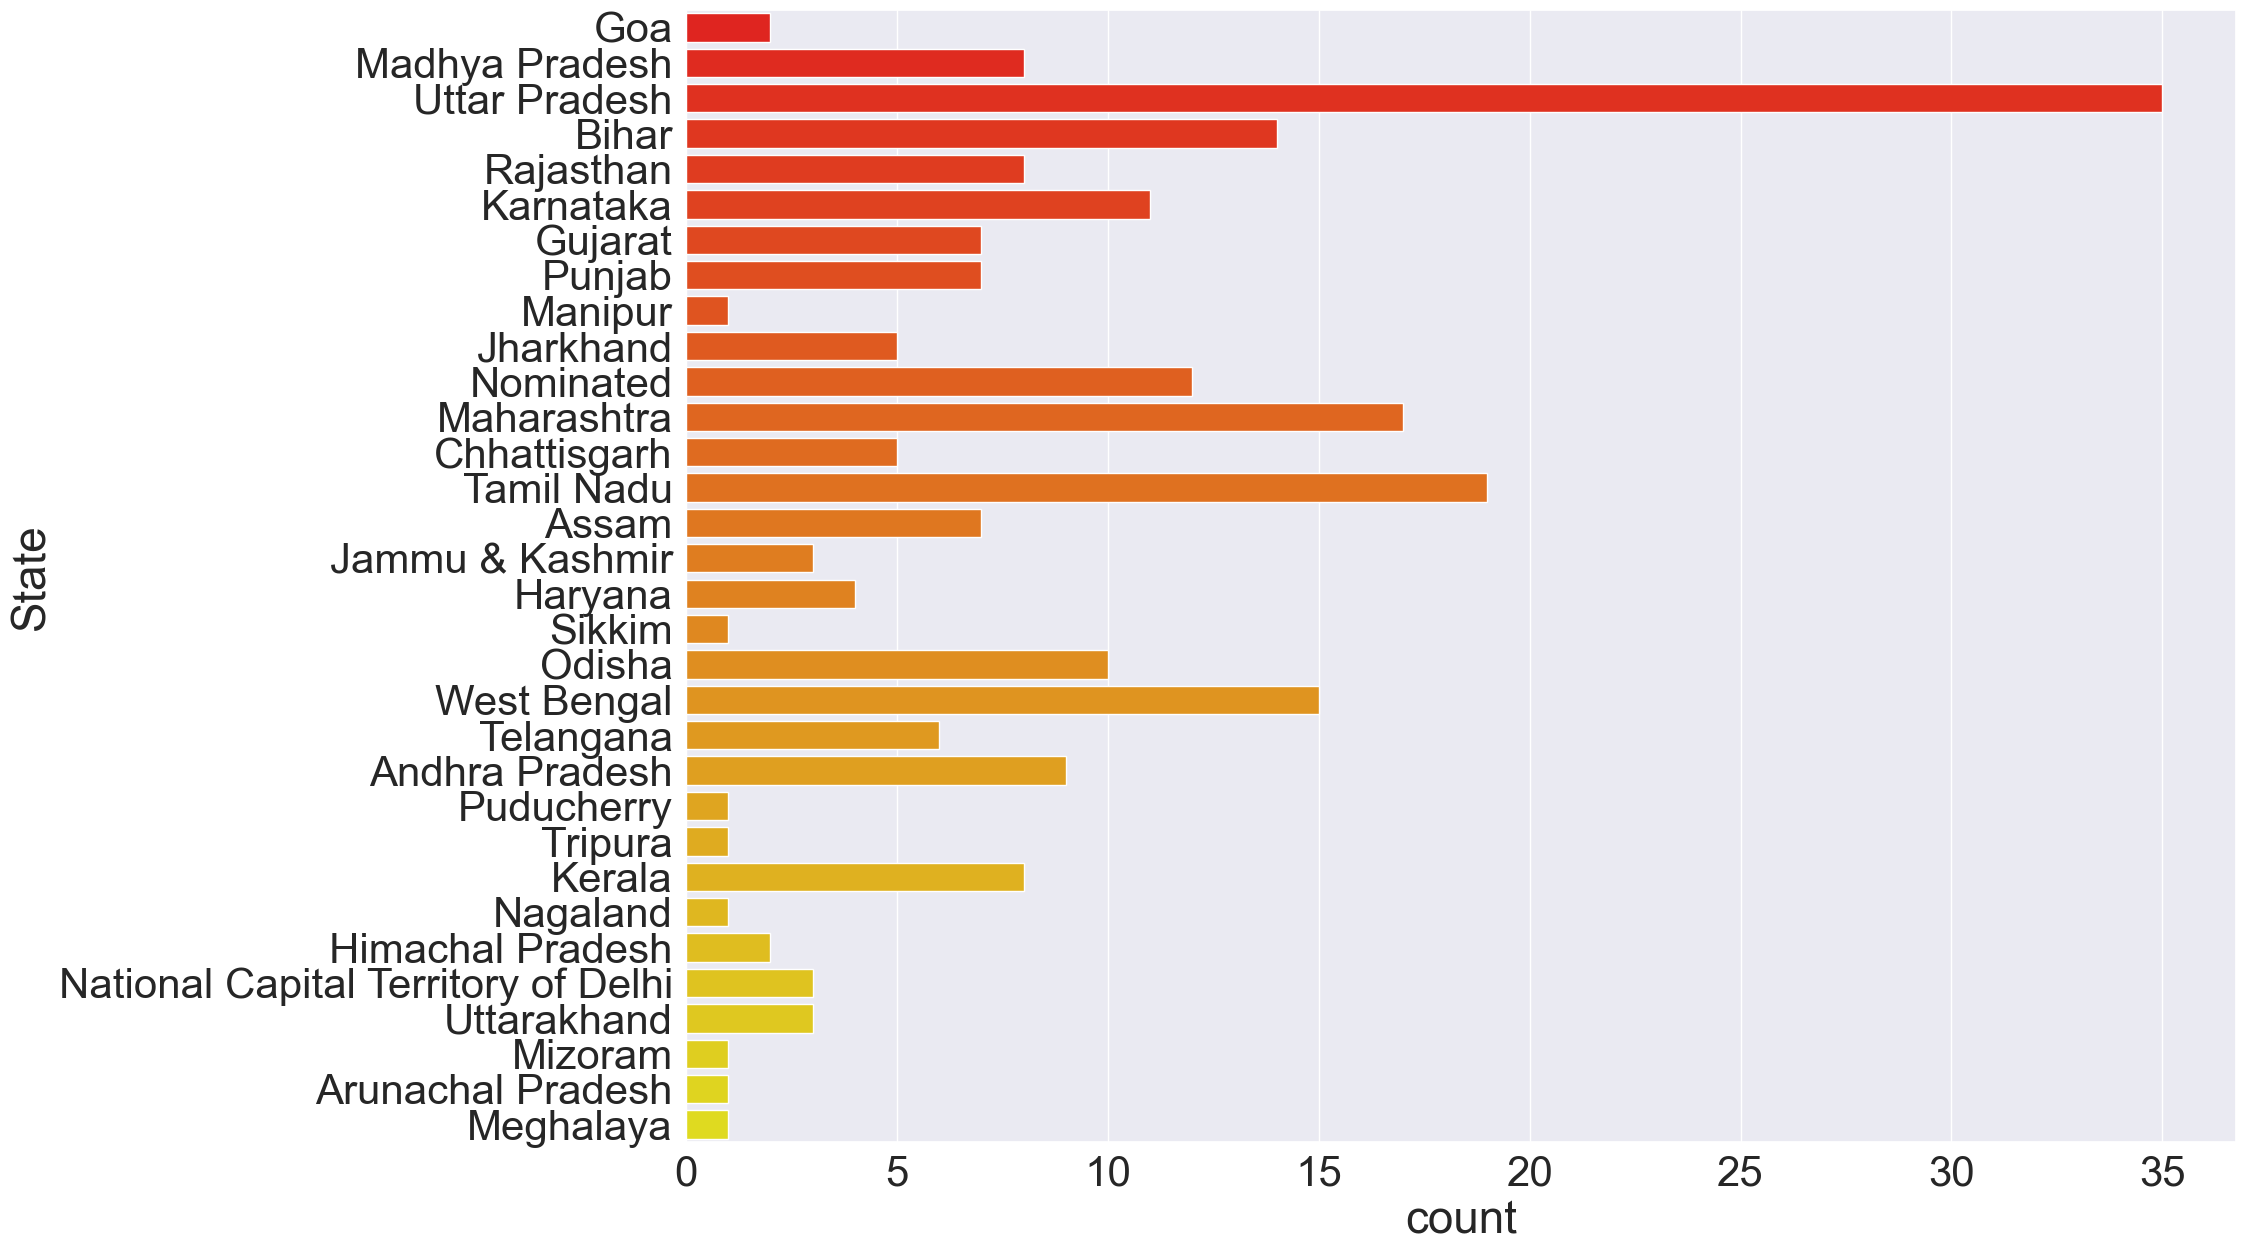

In [57]:
sns.set(font_scale=2.75)
plt.figure(figsize=(20,15))
sns.countplot(y="State", data=data, palette="autumn");
plt.show()

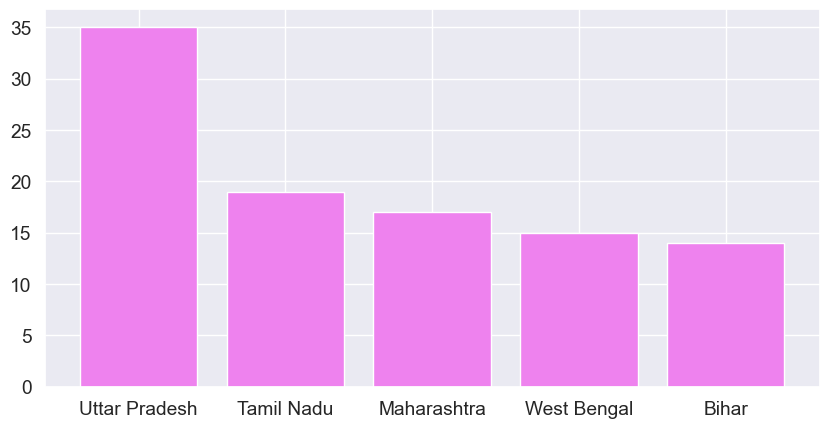

In [132]:
#checking the top 5 
plt.figure(figsize=(10,5))
plt.bar(list(data['State'].value_counts()[0:5].keys()),list(data['State'].value_counts()[0:5]),color='violet')
plt.show()

### top 3 states with more members

In [59]:
display(data[data['State'] == 'Uttar Pradesh'].shape)
data[data['State'] == 'Uttar Pradesh'].head(5)

(35, 5)

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
3,3,Shri Manohar Parrikar,Uttar Pradesh,1,18
10,10,Shri Vinay Katiyar,Uttar Pradesh,19,0
67,67,Shri Shiv Pratap Shukla,Uttar Pradesh,19,0
126,127,Prof. Ram Gopal Yadav,Uttar Pradesh,18,1
128,129,Km. Mayawati,Uttar Pradesh,2,17


In [60]:
display(data[data['State'] == 'Tamil Nadu'].shape)
data[data['State'] == 'Tamil Nadu'].head(5)

(19, 5)

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
53,53,Shri T. Rathinavel,Tamil Nadu,11,8
63,63,Smt. Sasikala Pushpa,Tamil Nadu,14,5
75,75,Shri A. Navaneethakrishnan,Tamil Nadu,16,3
80,80,Shri S.R. Balasubramoniyan,Tamil Nadu,19,0
84,84,Smt. Vijila Sathyananth,Tamil Nadu,19,0


In [61]:
display(data[data['State'] == 'Maharashtra'].shape)
data[data['State'] == 'Maharashtra'].head(5)

(17, 5)

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
38,38,Shri Sanjay Raut,Maharashtra,16,3
45,45,Shri Rajkumar Dhoot,Maharashtra,13,6
50,50,Shri Ajay Sancheti,Maharashtra,17,2
59,59,Dr. Vinay P. Sahasrabuddhe,Maharashtra,19,0
61,61,Shri Anil Desai,Maharashtra,17,2


In [62]:
display(data[data['State'] == 'Nominated'].shape)
data[data['State'] == 'Nominated']

(12, 5)

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
23,23,Smt. Roopa Ganguly,Nominated,17,2
49,49,Dr. Subramanian Swamy,Nominated,17,2
57,57,Shri Suresh Gopi,Nominated,16,3
98,98,Ms. Anu Aga,Nominated,11,8
99,99,Ms. Rekha,Nominated,1,18
100,100,Smt. M.C. Mary Kom,Nominated,13,6
101,101,Shri K. Parasaran,Nominated,18,1
102,102,Shri K.T.S. Tulsi,Nominated,15,4
103,103,Shri Sachin Ramesh Tendulkar,Nominated,2,17
106,106,Shri Sambhaji Chhatrapati,Nominated,18,1


### States with 1 member

In [63]:
data[data['State'] == 'Mizoram']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
226,223,Shri Ronald Sapa Tlau,Mizoram,19,0


In [64]:
data[data['State'] == 'Arunachal Pradesh']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
238,237,Shri Mukut Mithi,Arunachal Pradesh,14,5


In [65]:
data[data['State'] == 'Sikkim']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
74,74,Shri Hishey Lachungpa,Sikkim,9,10


In [66]:
data[data['State'] == 'Puducherry']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
107,107,Shri N. Gokulakrishnan,Puducherry,16,3


In [67]:
data[data['State'] == 'Nagaland']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
175,171,Shri K.G. Kenye,Nagaland,1,18


In [68]:
data[data['State'] == 'Tripura']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
146,144,Smt. Jharna Das Baidya,Tripura,16,3


In [69]:
data[data['State'] == 'Manipur']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
21,21,Shri K. Bhabananda Singh,Manipur,18,1


In [70]:
data[data['State'] == 'Meghalaya']

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
245,244,Smt. Wansuk Syiem,Meghalaya,12,7


## No_Of_Days_Member_Signed_The_Register

In [71]:
data.No_Of_Days_Member_Signed_The_Register.value_counts()

19    61
18    34
17    27
16    17
14    17
13    12
15     9
11     9
10     8
8      8
12     6
1      6
2      3
7      3
6      3
9      2
4      2
5      1
Name: No_Of_Days_Member_Signed_The_Register, dtype: int64

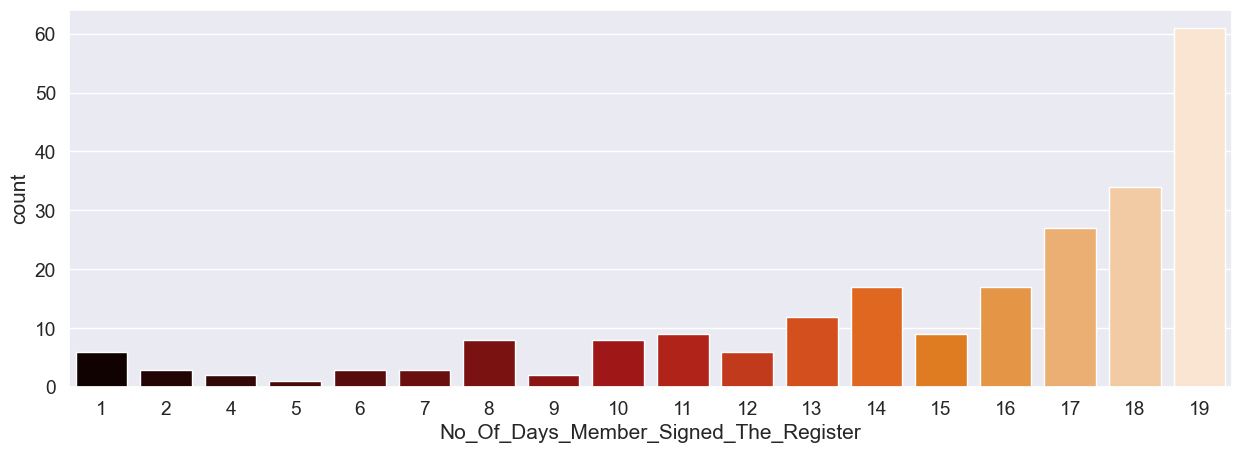

In [72]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,5))
sns.countplot(x="No_Of_Days_Member_Signed_The_Register", data=data, palette="gist_heat");
plt.show()

<AxesSubplot:xlabel='No_Of_Days_Member_Signed_The_Register', ylabel='Density'>

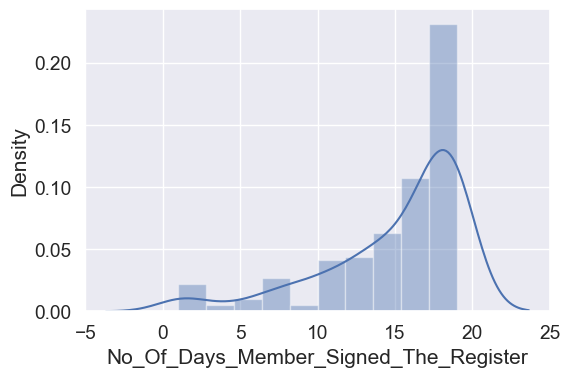

In [73]:
sns.distplot(data.No_Of_Days_Member_Signed_The_Register)

In [74]:
# Member's with least sign

In [75]:
data.sort_values(by = 'No_Of_Days_Member_Signed_The_Register' , ascending = True)[['Name_Of_Member','State','No_Of_Days_Member_Signed_The_Register']].head(10)

,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register
198,Dr. K. Chiranjeevi,Andhra Pradesh,1
3,Shri Manohar Parrikar,Uttar Pradesh,1
73,Shri Sanjay Dattatraya Kakade,Maharashtra,1
83,Shri Devender Goud T.,Andhra Pradesh,1
175,Shri K.G. Kenye,Nagaland,1
99,Ms. Rekha,Nominated,1
1,Smt. Sampatiya Uikey,Madhya Pradesh,2
128,Km. Mayawati,Uttar Pradesh,2
103,Shri Sachin Ramesh Tendulkar,Nominated,2
202,Dr. K. Keshava Rao,Andhra Pradesh,4


In [76]:
#Average day signed 

In [77]:
sign = data['No_Of_Days_Member_Signed_The_Register'].mean()
print(str(sign) + " is the Average day signed ")

15.035087719298245 is the Average day signed 


### Extracting member's with 19 days signed


In [78]:
data19= data[(data['No_Of_Days_Member_Signed_The_Register'] == 19)]

In [79]:
data19.head()

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
10,10,Shri Vinay Katiyar,Uttar Pradesh,19,0
12,12,Dr. Prabhakar Kore,Karnataka,19,0
13,13,Shri Meghraj Jain,Madhya Pradesh,19,0
17,17,Mahant Shambhuprasadji Tundiya,Gujarat,19,0
18,18,Shri Lal Sinh Vadodia,Gujarat,19,0


In [80]:
data19.shape

(61, 5)

In [81]:
data19.State.value_counts()

Uttar Pradesh       12
Karnataka            6
Maharashtra          5
Chhattisgarh         4
Gujarat              4
Tamil Nadu           3
Madhya Pradesh       3
Kerala               2
West Bengal          2
Himachal Pradesh     2
Punjab               2
Bihar                2
Odisha               2
Uttarakhand          2
Haryana              2
Assam                2
Andhra Pradesh       1
Jammu & Kashmir      1
Mizoram              1
Nominated            1
Telangana            1
Jharkhand            1
Name: State, dtype: int64

In [82]:
#checking out the number of categories present in each  categorical features.
data19.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Name_Of_Member    61
State             22
dtype: int64

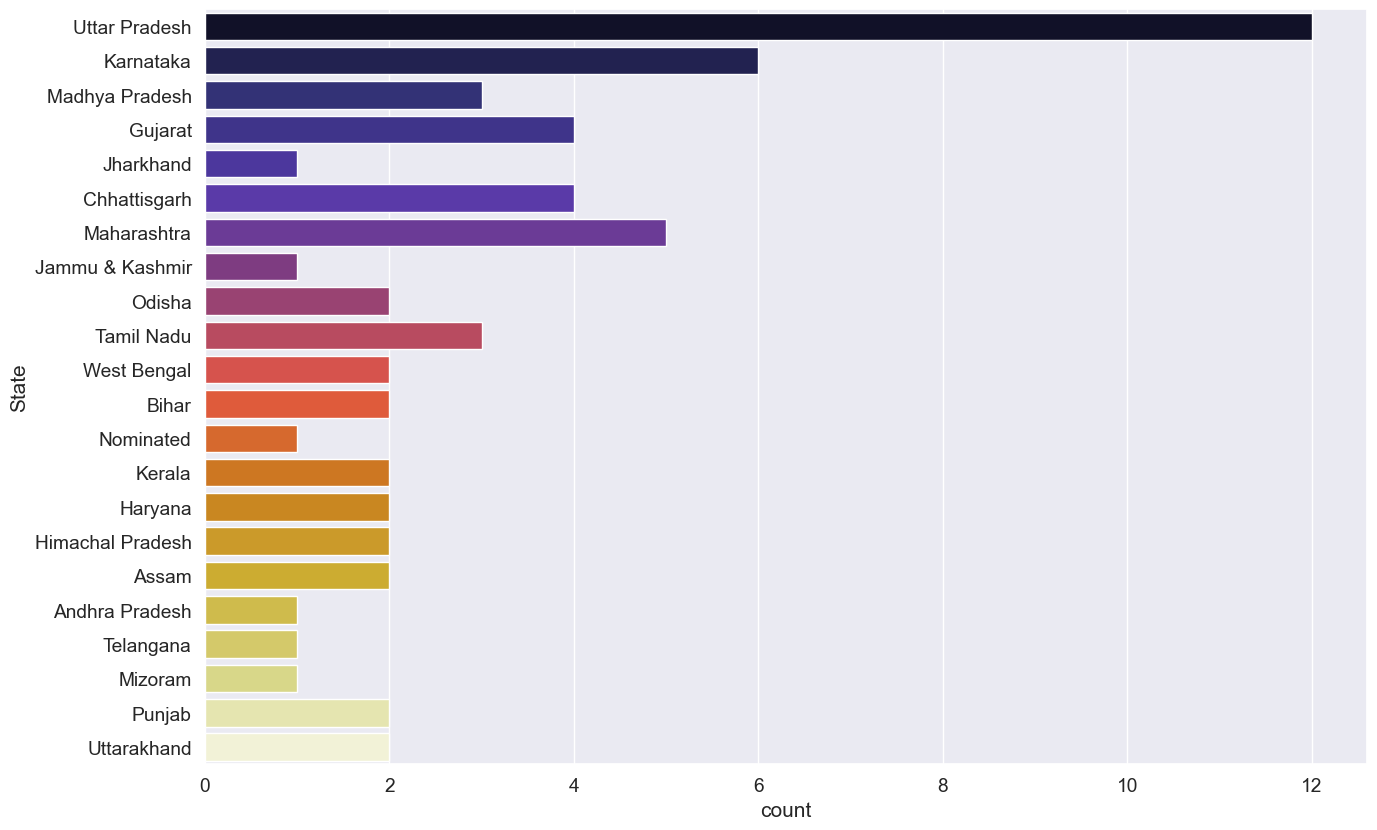

In [83]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,10))
sns.countplot(y="State", data=data19, palette="CMRmap");
plt.show()

In [84]:
data19[(data19['State'] == 'Uttar Pradesh')]

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
10,10,Shri Vinay Katiyar,Uttar Pradesh,19,0
67,67,Shri Shiv Pratap Shukla,Uttar Pradesh,19,0
131,131,Shri Naresh Agrawal,Uttar Pradesh,19,0
138,137,Shri Rewati Raman Singh,Uttar Pradesh,19,0
143,141,Smt. Jaya Bachchan,Uttar Pradesh,19,0
145,143,Shri Javed Ali Khan,Uttar Pradesh,19,0
154,151,Shri Vishambhar Prasad Nishad,Uttar Pradesh,19,0
164,161,Shri Alok Tiwari,Uttar Pradesh,19,0
167,164,Shri Neeraj Shekhar,Uttar Pradesh,19,0
178,175,Ch. Sukhram Singh Yadav,Uttar Pradesh,19,0


In [85]:
data19[(data19['State'] == 'Karnataka')]

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
12,12,Dr. Prabhakar Kore,Karnataka,19,0
46,46,Shri Basawaraj Patil,Karnataka,19,0
55,55,Shri Rangasayee Ramakrishna,Karnataka,19,0
192,189,Shri Jairam Ramesh,Karnataka,19,0
228,227,Prof. M.V. Rajeev Gowda,Karnataka,19,0
240,239,Shri B.K. Hariprasad,Karnataka,19,0


In [86]:
data19[(data19['State'] == 'Maharashtra')]

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
59,59,Dr. Vinay P. Sahasrabuddhe,Maharashtra,19,0
66,66,Shri Amar Shankar Sable,Maharashtra,19,0
68,68,Dr. Vikas Mahatme,Maharashtra,19,0
170,166,Smt. Vandana Chavan,Maharashtra,19,0
194,191,Shri Rajeev Shukla,Maharashtra,19,0


In [87]:
data19.State.value_counts()

Uttar Pradesh       12
Karnataka            6
Maharashtra          5
Chhattisgarh         4
Gujarat              4
Tamil Nadu           3
Madhya Pradesh       3
Kerala               2
West Bengal          2
Himachal Pradesh     2
Punjab               2
Bihar                2
Odisha               2
Uttarakhand          2
Haryana              2
Assam                2
Andhra Pradesh       1
Jammu & Kashmir      1
Mizoram              1
Nominated            1
Telangana            1
Jharkhand            1
Name: State, dtype: int64

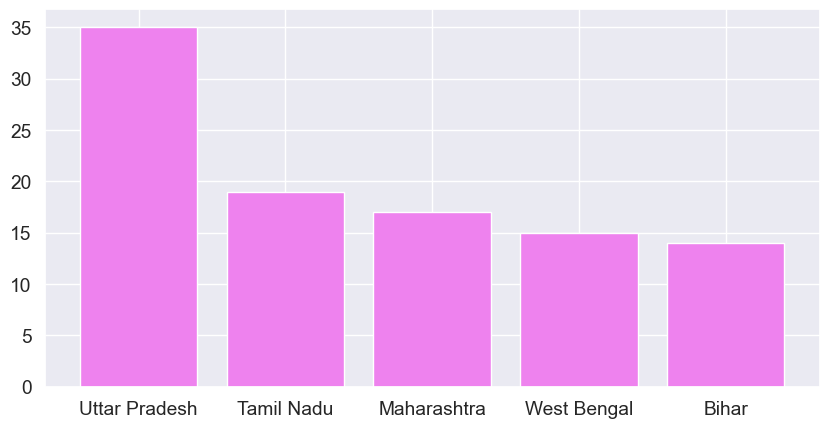

In [88]:
#checking the top 5 
plt.figure(figsize=(10,5))
plt.bar(list(data['State'].value_counts()[0:5].keys()),list(data['State'].value_counts()[0:5]),color='violet')
plt.show()

### Checking about Minister's

In [89]:
datam.head()

,s.no.,Division_SeatNo,Name_Of_Member,session,From_Date,To_Date,State,Total_Sittings,No_Of_Days_Member_Signed_The_Register
2,3,1,Shri Arun Jaitley,243,2017-07-17,2017-11-08,Gujarat,19,M
4,5,4,Shri Mukhtar Abbas Naqvi,243,2017-07-17,2017-11-08,Jharkhand,19,M
5,6,5,Smt. Nirmala Sitharaman,243,2017-07-17,2017-11-08,Karnataka,19,M
6,7,6,Shri Vijay Goel,243,2017-07-17,2017-11-08,Rajasthan,19,M
7,8,7,Shri Dharmendra Pradhan,243,2017-07-17,2017-11-08,Bihar,19,M


In [90]:
datam.shape

(19, 9)

In [91]:
datam.State.value_counts()

Gujarat             4
Madhya Pradesh      3
Maharashtra         2
Andhra Pradesh      2
Rajasthan           2
Bihar               2
Jharkhand           1
Karnataka           1
Himachal Pradesh    1
Haryana             1
Name: State, dtype: int64

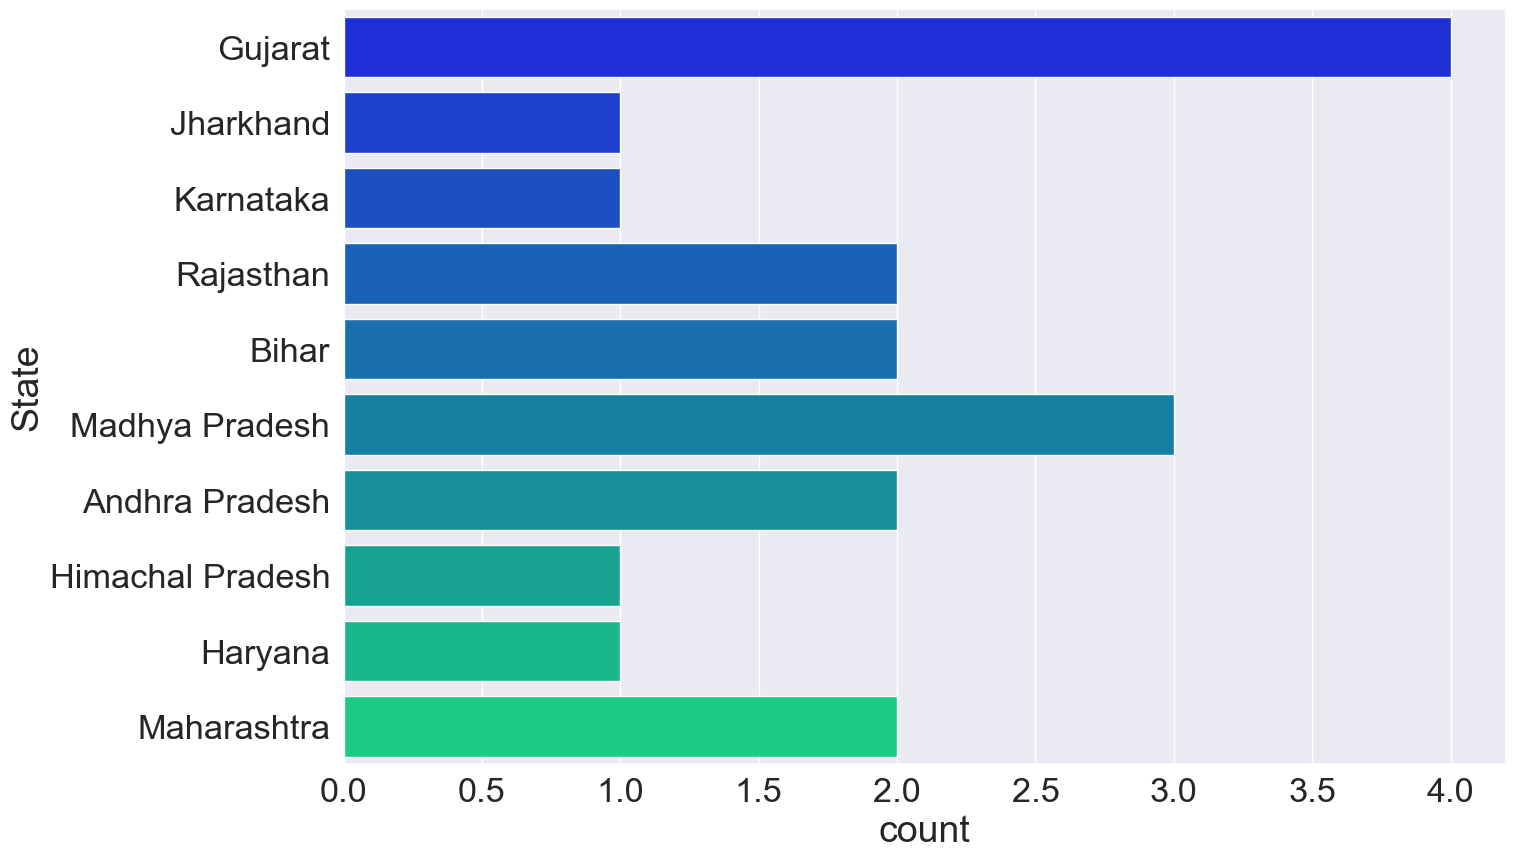

In [92]:
sns.set(font_scale=2.25)
plt.figure(figsize=(15,10))
sns.countplot(y="State", data=datam, palette="winter");
plt.show()

In [93]:
datam.No_Of_Days_Member_Signed_The_Register.value_counts()

M    19
Name: No_Of_Days_Member_Signed_The_Register, dtype: int64

In [94]:
#checking out the number of categories present in each  categorical features.
datam.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Name_Of_Member                           19
State                                    10
No_Of_Days_Member_Signed_The_Register     1
dtype: int64

In [95]:
datam.Name_Of_Member.value_counts()

Shri Mansukh L. Mandaviya    1
Smt. Smriti Zubin Irani      1
Shri Ravi Shankar Prasad     1
Shri Suresh Prabhu           1
Shri Piyush Goyal            1
Shri Mukhtar Abbas Naqvi     1
Chaudhary Birender Singh     1
Shri Vijay Goel              1
Shri Thaawar Chand Gehlot    1
Shri Y. S. Chowdary          1
Shri Ramdas Athawale         1
Shri Arun Jaitley            1
Smt. Nirmala Sitharaman      1
Shri Prakash Javadekar       1
Shri Jagat Prakash Nadda     1
Shri Dharmendra Pradhan      1
Shri Parshottam Rupala       1
Shri M. J. Akbar             1
Shri M. Venkaiah Naidu       1
Name: Name_Of_Member, dtype: int64

In [96]:
# Minister's and there states

In [97]:
datam.sort_values(by = 'Division_SeatNo' , ascending = True)[['Name_Of_Member','State']]

,Name_Of_Member,State
2,Shri Arun Jaitley,Gujarat
4,Shri Mukhtar Abbas Naqvi,Jharkhand
5,Smt. Nirmala Sitharaman,Karnataka
6,Shri Vijay Goel,Rajasthan
7,Shri Dharmendra Pradhan,Bihar
8,Shri Parshottam Rupala,Gujarat
24,Shri M. Venkaiah Naidu,Rajasthan
25,Shri Ravi Shankar Prasad,Bihar
26,Shri Thaawar Chand Gehlot,Madhya Pradesh
27,Shri Suresh Prabhu,Andhra Pradesh


### Average signed for each state

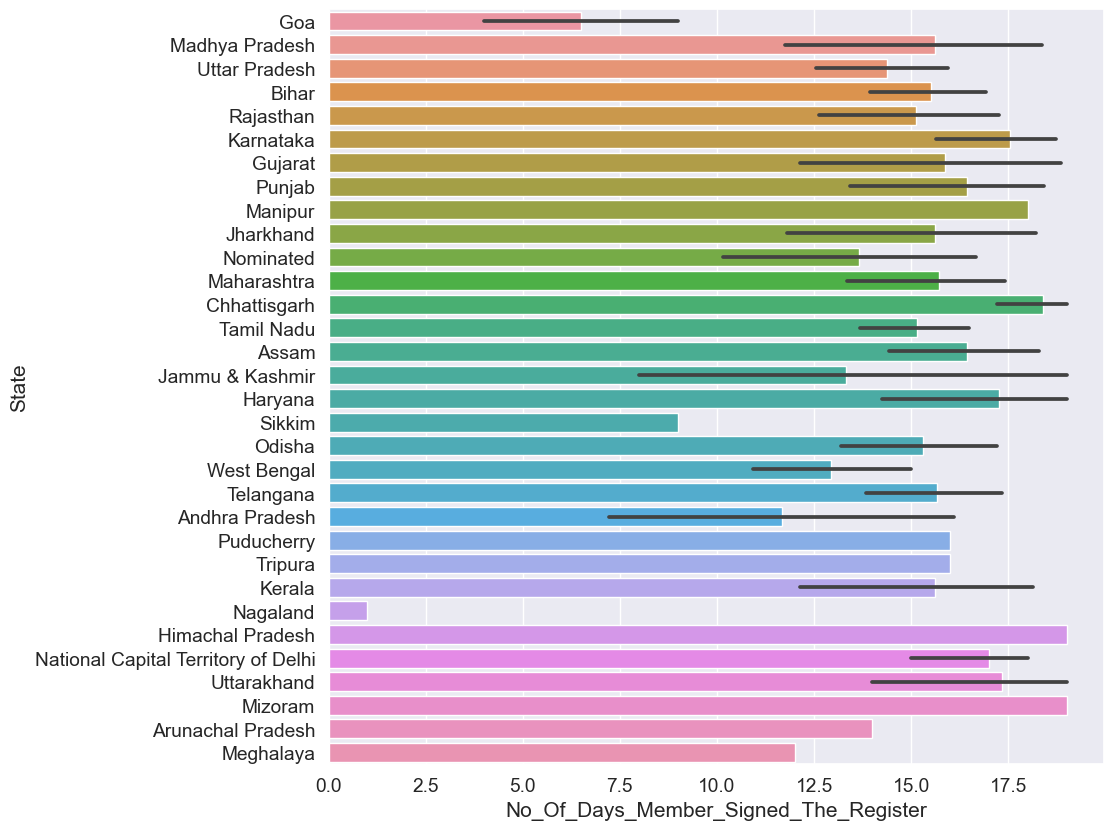

In [98]:
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
sns.barplot(data['No_Of_Days_Member_Signed_The_Register'],data['State'])
plt.show()

In [99]:
data.groupby(by='State')['No_Of_Days_Member_Signed_The_Register'].mean()

State
Andhra Pradesh                         11.666667
Arunachal Pradesh                      14.000000
Assam                                  16.428571
Bihar                                  15.500000
Chhattisgarh                           18.400000
Goa                                     6.500000
Gujarat                                15.857143
Haryana                                17.250000
Himachal Pradesh                       19.000000
Jammu & Kashmir                        13.333333
Jharkhand                              15.600000
Karnataka                              17.545455
Kerala                                 15.625000
Madhya Pradesh                         15.625000
Maharashtra                            15.705882
Manipur                                18.000000
Meghalaya                              12.000000
Mizoram                                19.000000
Nagaland                                1.000000
National Capital Territory of Delhi    17.000000
Nominated     

In [100]:
data.groupby(by='State')['No_Of_Days_Member_Signed_The_Register'].value_counts()

State                                No_Of_Days_Member_Signed_The_Register
Andhra Pradesh                       1                                         2
                                     14                                        2
                                     17                                        2
                                     4                                         1
                                     18                                        1
                                     19                                        1
Arunachal Pradesh                    14                                        1
Assam                                12                                        2
                                     18                                        2
                                     19                                        2
                                     17                                        1
Bihar                             

In [101]:
data.State.value_counts()

Uttar Pradesh                          35
Tamil Nadu                             19
Maharashtra                            17
West Bengal                            15
Bihar                                  14
Nominated                              12
Karnataka                              11
Odisha                                 10
Andhra Pradesh                          9
Rajasthan                               8
Madhya Pradesh                          8
Kerala                                  8
Punjab                                  7
Gujarat                                 7
Assam                                   7
Telangana                               6
Chhattisgarh                            5
Jharkhand                               5
Haryana                                 4
Uttarakhand                             3
Jammu & Kashmir                         3
National Capital Territory of Delhi     3
Himachal Pradesh                        2
Goa                               

In [102]:
up = data[data.State == 'Uttar Pradesh'] 
up.shape

(35, 5)

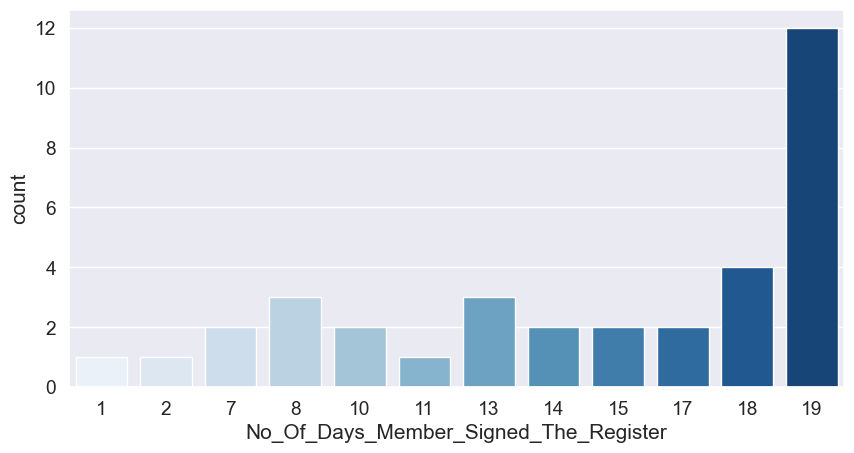

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(x="No_Of_Days_Member_Signed_The_Register", data=up, palette="Blues");
plt.show()


In [104]:
tn = data[data.State == 'Tamil Nadu'] 
tn.shape

(19, 5)

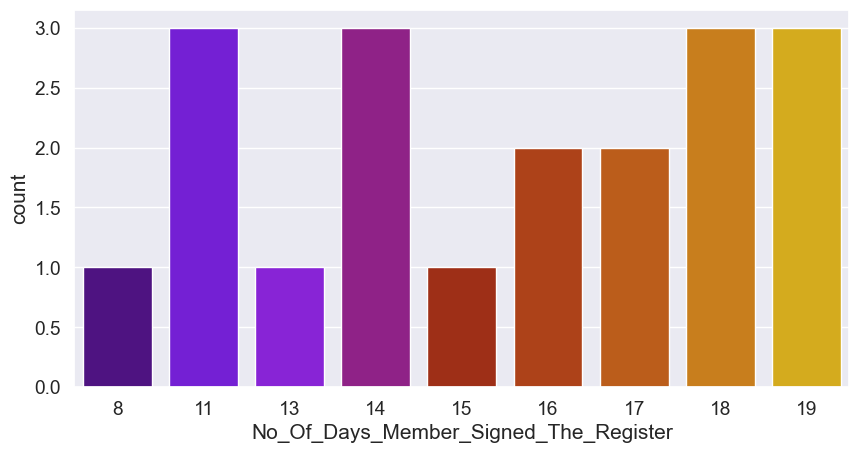

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(x="No_Of_Days_Member_Signed_The_Register", data=tn, palette="gnuplot");
plt.show()


In [106]:
mh = data[data.State == 'Maharashtra'] 
mh.shape

(17, 5)

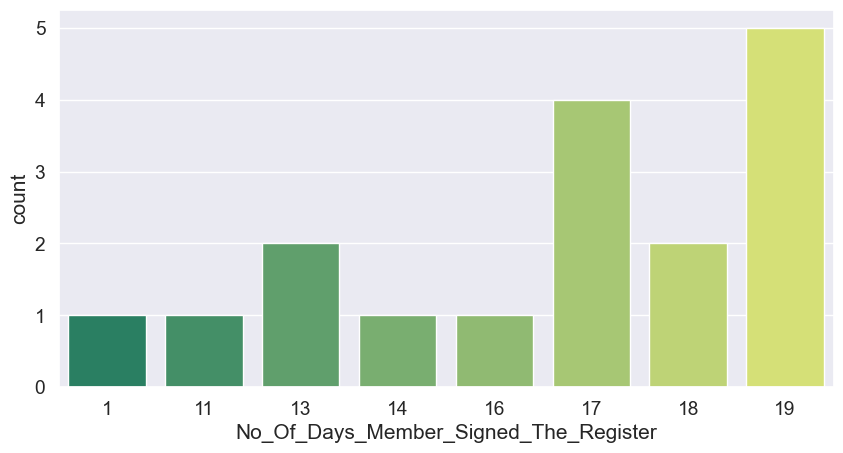

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(x="No_Of_Days_Member_Signed_The_Register", data=mh, palette="summer");
plt.show()


In [108]:
data.head()

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
0,0,Shri Vinay Dinu Tendulkar,Goa,9,10
1,0,Smt. Sampatiya Uikey,Madhya Pradesh,2,17
3,3,Shri Manohar Parrikar,Uttar Pradesh,1,18
9,9,Shri Gopal Narayan Singh,Bihar,18,1
10,10,Shri Vinay Katiyar,Uttar Pradesh,19,0


In [109]:
data2=data[['State', 'No_Of_Days_Member_Signed_The_Register']]

In [110]:
data2.head()

,State,No_Of_Days_Member_Signed_The_Register
0,Goa,9
1,Madhya Pradesh,2
3,Uttar Pradesh,1
9,Bihar,18
10,Uttar Pradesh,19


In [111]:
data3=data2.set_index(['State'])

In [112]:
data3.head(10)

,No_Of_Days_Member_Signed_The_Register
State,
Goa,9
Madhya Pradesh,2
Uttar Pradesh,1
Bihar,18
Uttar Pradesh,19
Rajasthan,14
Karnataka,19
Madhya Pradesh,19
Rajasthan,16


In [113]:
data4 = data3.groupby('State').aggregate(np.sum)

In [114]:
data4.head()

,No_Of_Days_Member_Signed_The_Register
State,
Andhra Pradesh,105
Arunachal Pradesh,14
Assam,115
Bihar,217
Chhattisgarh,92


In [115]:
data4.No_Of_Days_Member_Signed_The_Register.value_counts()

125    2
16     2
115    2
193    1
288    1
121    1
503    1
52     1
51     1
1      1
111    1
105    1
40     1
38     1
164    1
94     1
194    1
92     1
153    1
19     1
18     1
14     1
78     1
13     1
12     1
267    1
9      1
69     1
217    1
Name: No_Of_Days_Member_Signed_The_Register, dtype: int64

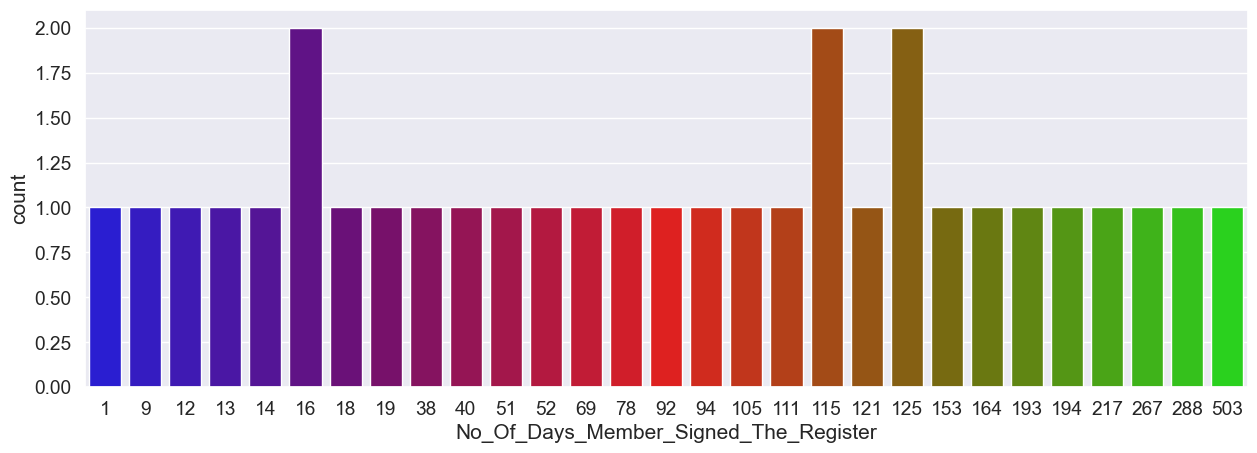

In [116]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,5))
sns.countplot(x="No_Of_Days_Member_Signed_The_Register", data=data4, palette="brg");
plt.show()

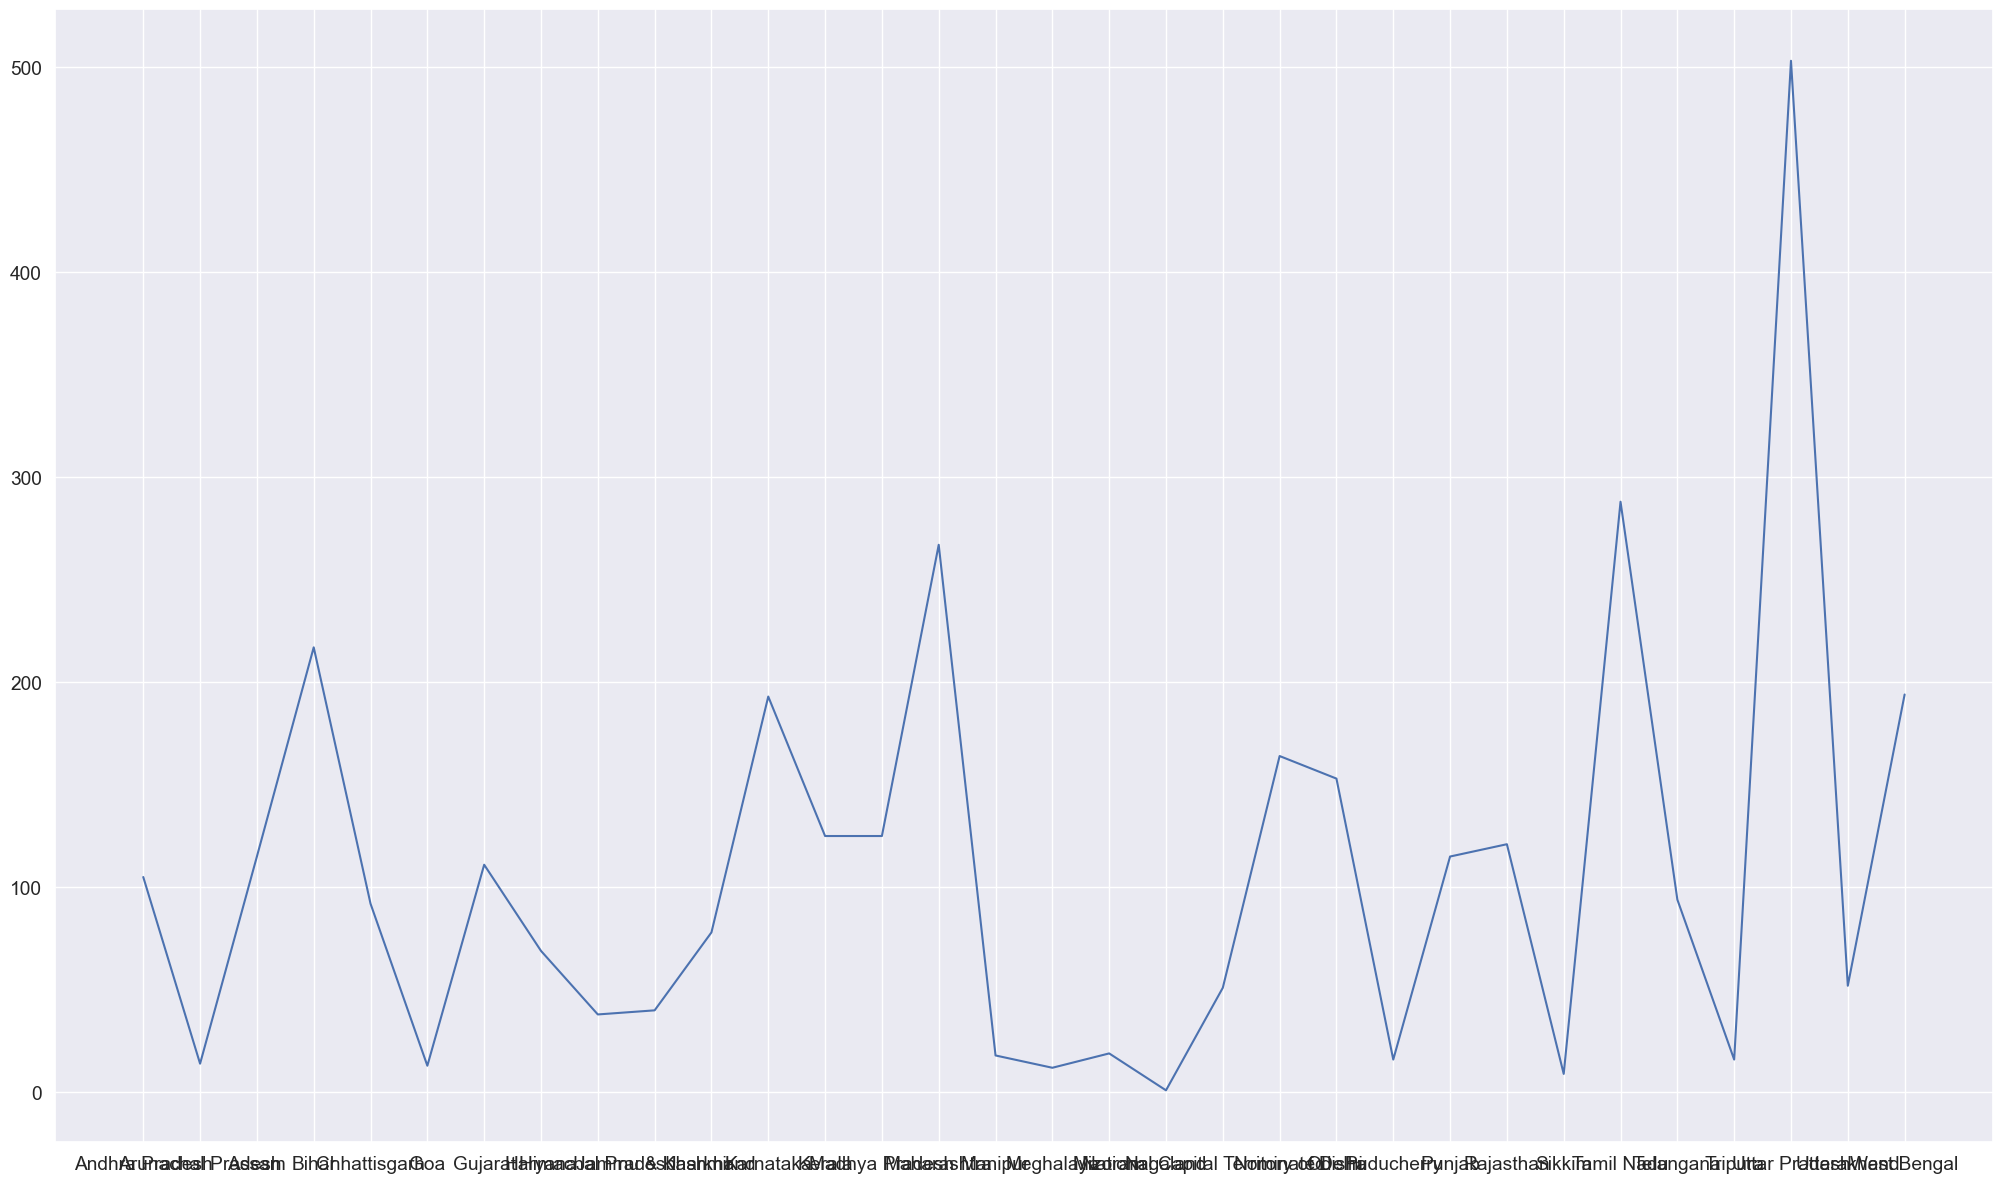

In [117]:
## Plotting the data
plt.figure(figsize=(25,15))
plt.yticks(rotation=90)
plt.plot(data4)


## highest

In [118]:
data4[(data4['No_Of_Days_Member_Signed_The_Register'] == 503 )]

,No_Of_Days_Member_Signed_The_Register
State,
Uttar Pradesh,503


In [119]:
data4[(data4['No_Of_Days_Member_Signed_The_Register'] == 288 )]

,No_Of_Days_Member_Signed_The_Register
State,
Tamil Nadu,288


In [120]:
data4[(data4['No_Of_Days_Member_Signed_The_Register'] == 267 )]

,No_Of_Days_Member_Signed_The_Register
State,
Maharashtra,267


## least

In [121]:
data4[(data4['No_Of_Days_Member_Signed_The_Register'] == 1 )]

,No_Of_Days_Member_Signed_The_Register
State,
Nagaland,1


In [122]:
data4[(data4['No_Of_Days_Member_Signed_The_Register'] == 9 )]

,No_Of_Days_Member_Signed_The_Register
State,
Sikkim,9


In [123]:
data4[(data4['No_Of_Days_Member_Signed_The_Register'] == 12 )]

,No_Of_Days_Member_Signed_The_Register
State,
Meghalaya,12


In [124]:
#unsigned

In [125]:
data.Unsigned_Days.value_counts()

0     61
1     34
2     27
3     17
5     17
6     12
4      9
8      9
11     8
9      8
7      6
18     6
12     3
13     3
17     3
10     2
15     2
14     1
Name: Unsigned_Days, dtype: int64

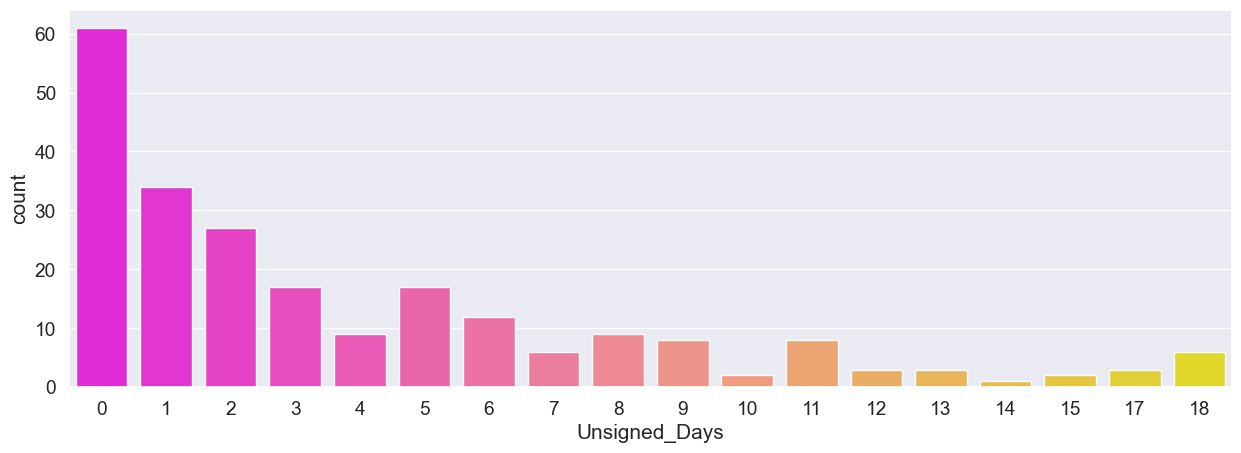

In [126]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,5))
sns.countplot(x="Unsigned_Days", data=data, palette="spring");
plt.show()

In [127]:
display(data[data['Unsigned_Days'] == 18].shape)
data[data['Unsigned_Days'] == 18].head(10)

#data[(data['No_Of_Days_Member_Signed_The_Register'] ==18)]

(6, 5)

,Division_SeatNo,Name_Of_Member,State,No_Of_Days_Member_Signed_The_Register,Unsigned_Days
3,3,Shri Manohar Parrikar,Uttar Pradesh,1,18
73,73,Shri Sanjay Dattatraya Kakade,Maharashtra,1,18
83,83,Shri Devender Goud T.,Andhra Pradesh,1,18
99,99,Ms. Rekha,Nominated,1,18
175,171,Shri K.G. Kenye,Nagaland,1,18
198,195,Dr. K. Chiranjeevi,Andhra Pradesh,1,18


In [128]:
#Average day signed 
sign = data['Unsigned_Days'].mean()
print(str(sign) + " is the Average unsigned day")

3.9649122807017543 is the Average unsigned day


In [129]:
data18= data[(data['Unsigned_Days'] == 18)]

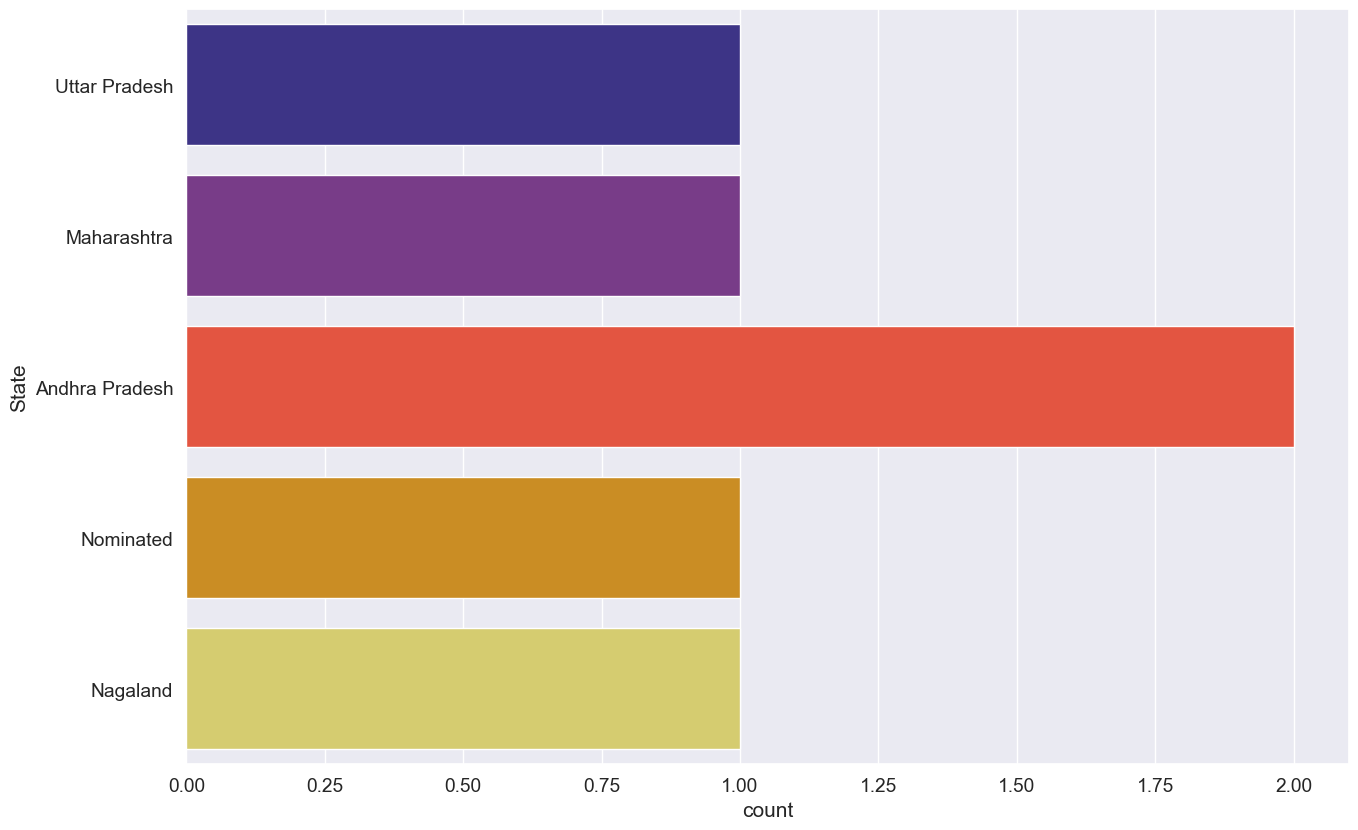

In [130]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,10))
sns.countplot(y="State", data=data18, palette="CMRmap");
plt.show()

In [131]:
data.groupby(by='State')['Unsigned_Days'].mean()

State
Andhra Pradesh                          7.333333
Arunachal Pradesh                       5.000000
Assam                                   2.571429
Bihar                                   3.500000
Chhattisgarh                            0.600000
Goa                                    12.500000
Gujarat                                 3.142857
Haryana                                 1.750000
Himachal Pradesh                        0.000000
Jammu & Kashmir                         5.666667
Jharkhand                               3.400000
Karnataka                               1.454545
Kerala                                  3.375000
Madhya Pradesh                          3.375000
Maharashtra                             3.294118
Manipur                                 1.000000
Meghalaya                               7.000000
Mizoram                                 0.000000
Nagaland                               18.000000
National Capital Territory of Delhi     2.000000
Nominated     